In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import math

In [107]:
data = pd.read_csv('DATA/A-train.csv')
data

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.93,-60.46,1137.04,-3.49,NaN,-5.88,-17.13,7.44
1,-68.18,-127.21,23.30,1471.49,16.95,2.30,-11.51,-7.70,7.31
2,-95.05,36.10,-75.27,1158.04,6.97,3.21,-5.86,8.65,-5.77
3,124.40,-8.19,NaN,5527.92,7.36,7.23,10.77,1.92,-0.42
4,-103.25,NaN,-2.89,4865.06,-5.21,-1.54,NaN,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.65,-44.41,9775.28,-3.43,4.95,4.60,-11.73,11.78
186,1.62,145.02,53.26,4546.80,11.81,-4.31,4.86,-0.42,3.79
187,29.46,33.91,-20.96,6083819.57,5.10,2.93,1.23,3.23,-3.17
188,-64.93,25.39,-118.74,1746.40,226.26,-1.91,-16.11,-10.44,0.97


In [108]:
imputer = KNNImputer(n_neighbors=11, weights="uniform")
imputer.fit_transform(data)
data[:] = imputer.transform(data)

In [109]:
data[:]

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,26.52,89.930000,-60.460000,1137.04,-3.49,4.477273,-5.880000,-17.13,7.44
1,-68.18,-127.210000,23.300000,1471.49,16.95,2.300000,-11.510000,-7.70,7.31
2,-95.05,36.100000,-75.270000,1158.04,6.97,3.210000,-5.860000,8.65,-5.77
3,124.40,-8.190000,-73.057273,5527.92,7.36,7.230000,10.770000,1.92,-0.42
4,-103.25,-154.431818,-2.890000,4865.06,-5.21,-1.540000,4.228182,4.69,4.31
...,...,...,...,...,...,...,...,...,...
185,34.29,-38.650000,-44.410000,9775.28,-3.43,4.950000,4.600000,-11.73,11.78
186,1.62,145.020000,53.260000,4546.80,11.81,-4.310000,4.860000,-0.42,3.79
187,29.46,33.910000,-20.960000,6083819.57,5.10,2.930000,1.230000,3.23,-3.17
188,-64.93,25.390000,-118.740000,1746.40,226.26,-1.910000,-16.110000,-10.44,0.97


In [110]:
column = ['x1','x2','x3','x4','x5','x6','x7','x8']
for i in column:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    for j in range(len(data)):
        if(data[i][j] < lower_bound ):
            data[i][j] = lower_bound
        elif(data[i][j] > upper_bound ):
            data[i][j] = upper_bound
        inplace=True

In [111]:
X = data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y = data[["y"]]

<AxesSubplot:>

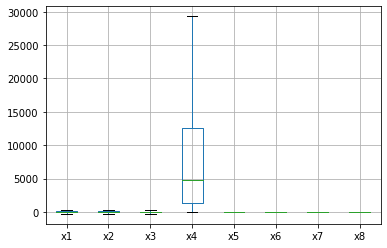

In [112]:
X.boxplot()

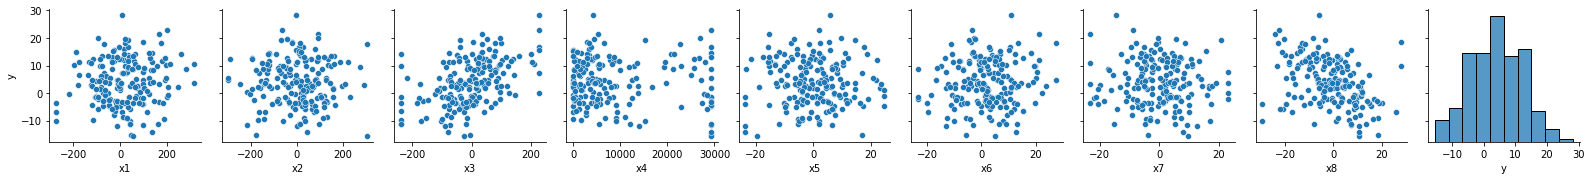

In [113]:
sns.pairplot(data, x_vars=data.columns, y_vars=["y"])

<AxesSubplot:>

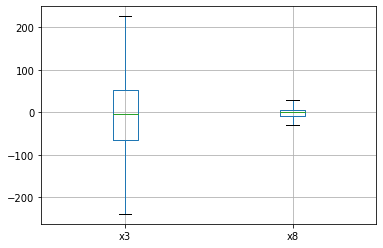

In [114]:
X = data[["x3","x8"]]
Y = data[["y"]]
X.boxplot()

In [115]:
# list = []
# for i in range(500):
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
#     lm = LinearRegression()
#     lm.fit(X_train,y_train)
#     y_pred = lm.predict(X_test)
#     m = lm.coef_
#     c = lm.intercept_
#     MSE = np.square(np.subtract(y_test,y_pred)).mean()
#     RMSE = math.sqrt(MSE)
#     list.append(RMSE)

In [117]:
list = []
for i in range(500):
    # irisData = load_iris()
    # X = irisData.data
    # Y = irisData.target
    X = data[["x3","x8"]]
    Y = data[["y"]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # m = knn.coef_
    # c = knn.intercept_
    # MSE = np.square(np.subtract(y_test,y_pred)).mean()
    # RMSE = math.sqrt(MSE)
    # list.append(RMSE)

    list.append(accuracy_score(y_test, y_pred)*100)

c:\Users\66820\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: Unknown label type: 'continuous'

In [ ]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 0])

In [ ]:
y_pred-y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
average = sum(list) / len(list)
print("AVERAGE 500 RMSE =" ,average)

AVERAGE 500 RMSE = 96.41333333333331
